# SVM (Support Vector Machine)

- 지도 학습
- 분류, 회귀 문제
- 고차원 공간으로 **매핑 후 결정 경계(descision boundary)** 와 **초 평면(hyperplane)** 을 찾는 것

## 주요 키워드

- 서포트 벡터 (support vector)
    
    두 클래스 사이의 경계에 위치한 데이터 포인트 들
    
- 결정 경계 (descision boundary)
    
    서로 다른 클래스를 분리하는 경계 (초 평면)
    
- 마진 (margin)
    
    결정 경계와 가장 가까운 서포트 벡터 (데이터 포인트) 사이의 거리
    
- kernel
    
    차원을 추가할 시에 좀더 확실한 구분이 가능할 수 있다.
    

In [10]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "NanumSquareRound")
plt.rcParams["axes.unicode_minus"] = False

In [11]:
data = pd.read_csv("../../data/heart.csv")

In [17]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
X=data[["age","chol"]]
y=data["output"]

In [23]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 특성 스케일링(트레인 데이터 기준 스케일링)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

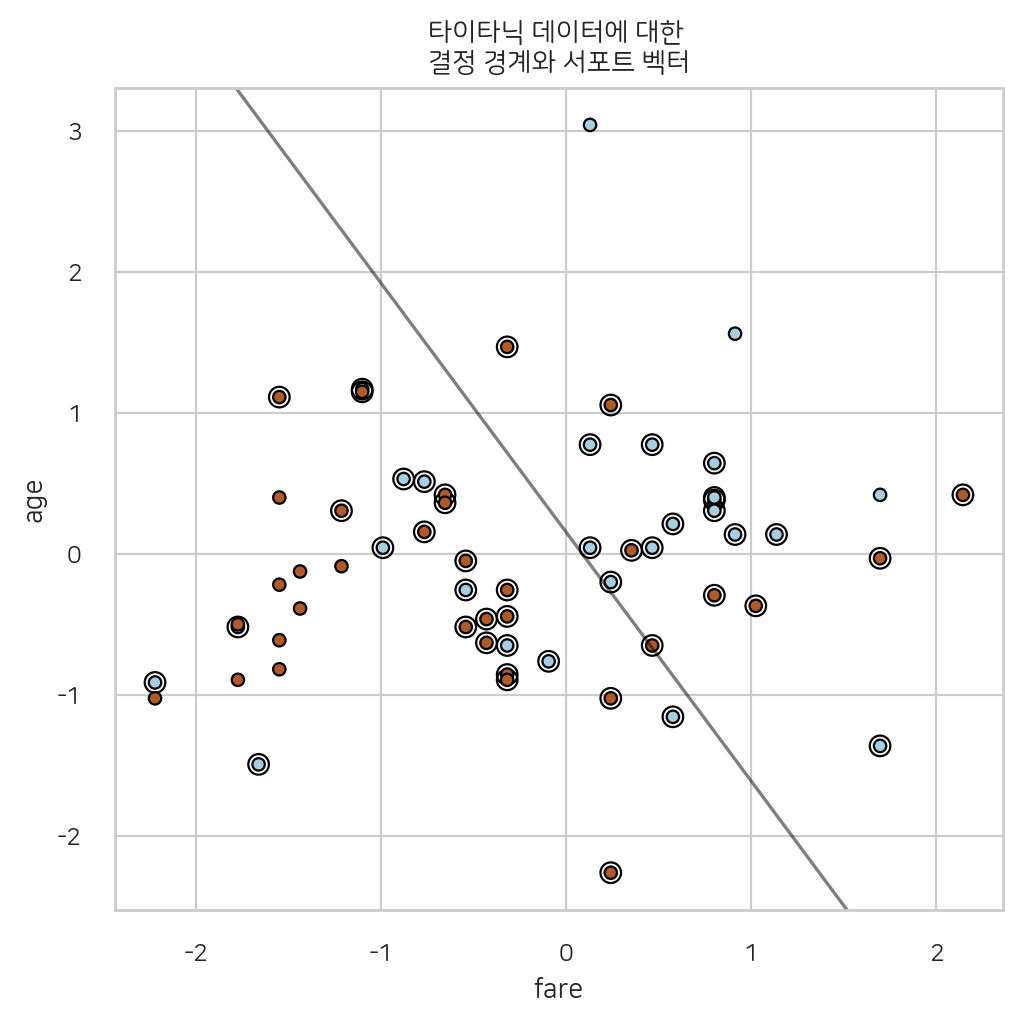

In [26]:
# SVM 모델 학습
svc_model = SVC(kernel='linear')
svc_model.fit(X_test, y_test)
support_vectors = svc_model.support_vectors_

fig, ax = plt.subplots(figsize=(5,5))
# 서포트 벡터와 결정 경계 시각화

# 서포트 벡터 시각화
ax.scatter(svc_model.support_vectors_[:, 0],
            svc_model.support_vectors_[:, 1],
            s=55,
            facecolors='none',
            edgecolors='k',
)
# 데이터 포인트 시각화
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k', s=20)

# 결정 경계 시각화
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 결정 경계 그리기
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svc_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

plt.title('타이타닉 데이터에 대한 \n결정 경계와 서포트 벡터')
plt.xlabel('fare')
plt.ylabel('age');